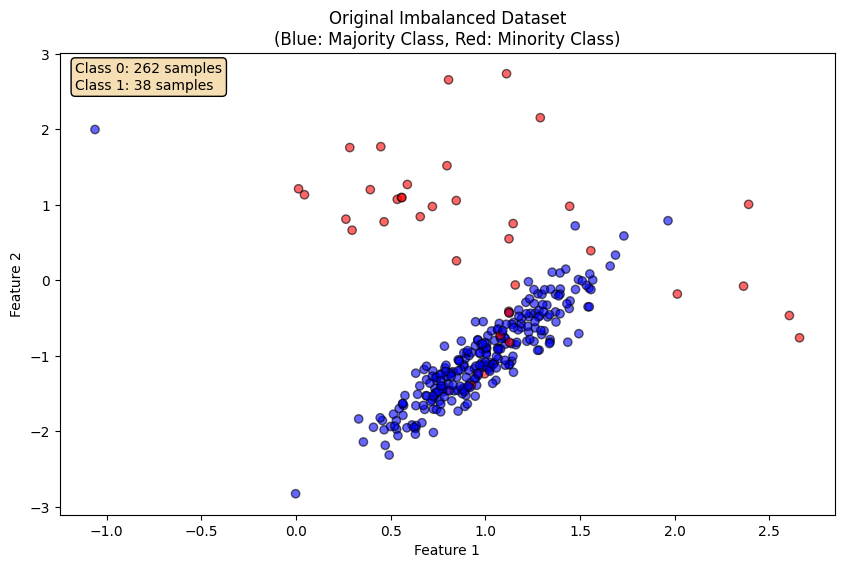

Class distribution:
Class 0 (Majority): 262 samples (87.3%)
Class 1 (Minority): 38 samples (12.7%)


In [1]:
# Understanding the Problem SMOTE Solves
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import seaborn as sns

# Let's create a visual example of class imbalance
np.random.seed(42)

# Create an imbalanced dataset
# Think of this as a simplified version of our income prediction problem
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, weights=[0.9, 0.1],
                          flip_y=0.05, random_state=42)

# Visualize the imbalance
plt.figure(figsize=(10, 6))
colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='black')
plt.title('Original Imbalanced Dataset\n(Blue: Majority Class, Red: Minority Class)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add text showing the imbalance
unique, counts = np.unique(y, return_counts=True)
plt.text(0.02, 0.98, f'Class 0: {counts[0]} samples\nClass 1: {counts[1]} samples',
         transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='wheat'),
         verticalalignment='top')
plt.show()

print(f"Class distribution:")
print(f"Class 0 (Majority): {counts[0]} samples ({counts[0]/len(y)*100:.1f}%)")
print(f"Class 1 (Minority): {counts[1]} samples ({counts[1]/len(y)*100:.1f}%)")

Minority class has 38 samples


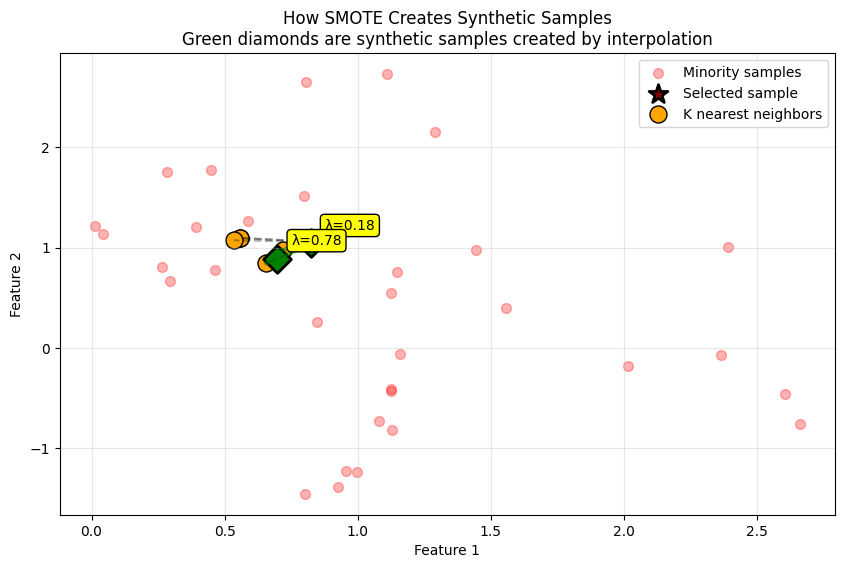

In [2]:
# Let's implement a simplified version to understand the algorithm

def simple_smote_visualization(X_minority, k_neighbors=5):
    """
    Visualize how SMOTE creates synthetic samples.
    This is a teaching implementation - not for production use!
    """
    from sklearn.neighbors import NearestNeighbors
    
    # Fit nearest neighbors
    nn = NearestNeighbors(n_neighbors=k_neighbors + 1)  # +1 because it includes itself
    nn.fit(X_minority)
    
    # For visualization, let's create one synthetic sample
    # Pick a random minority class sample
    sample_idx = np.random.randint(0, len(X_minority))
    sample = X_minority[sample_idx]
    
    # Find its k nearest neighbors
    distances, indices = nn.kneighbors([sample])
    neighbor_indices = indices[0][1:]  # Exclude the sample itself
    
    # Visualize
    plt.figure(figsize=(10, 6))
    
    # Plot all minority samples
    plt.scatter(X_minority[:, 0], X_minority[:, 1], c='red', 
                alpha=0.3, s=50, label='Minority samples')
    
    # Highlight the selected sample
    plt.scatter(sample[0], sample[1], c='darkred', s=200, 
                marker='*', label='Selected sample', edgecolors='black', linewidth=2)
    
    # Plot its neighbors
    neighbors = X_minority[neighbor_indices]
    plt.scatter(neighbors[:, 0], neighbors[:, 1], c='orange', 
                s=150, marker='o', label='K nearest neighbors', edgecolors='black')
    
    # Draw lines to neighbors
    for neighbor in neighbors:
        plt.plot([sample[0], neighbor[0]], [sample[1], neighbor[1]], 
                'k--', alpha=0.3)
    
    # Create and plot synthetic samples
    synthetic_samples = []
    for neighbor in neighbors[:2]:  # Create 2 synthetic samples for visualization
        # SMOTE formula: synthetic = sample + lambda * (neighbor - sample)
        # where lambda is random between 0 and 1
        lambda_param = np.random.random()
        synthetic = sample + lambda_param * (neighbor - sample)
        synthetic_samples.append(synthetic)
        
        # Visualize the interpolation
        plt.plot([sample[0], neighbor[0]], [sample[1], neighbor[1]], 
                'g-', linewidth=3, alpha=0.5)
        plt.scatter(synthetic[0], synthetic[1], c='green', s=200, 
                   marker='D', edgecolors='black', linewidth=2)
        
        # Add annotation
        plt.annotate(f'λ={lambda_param:.2f}', 
                    xy=(synthetic[0], synthetic[1]), 
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow'))
    
    plt.legend()
    plt.title('How SMOTE Creates Synthetic Samples\n' + 
              'Green diamonds are synthetic samples created by interpolation')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return np.array(synthetic_samples)

# Extract minority class samples
X_minority = X[y == 1]
print(f"Minority class has {len(X_minority)} samples")

# Visualize SMOTE process
synthetic = simple_smote_visualization(X_minority)

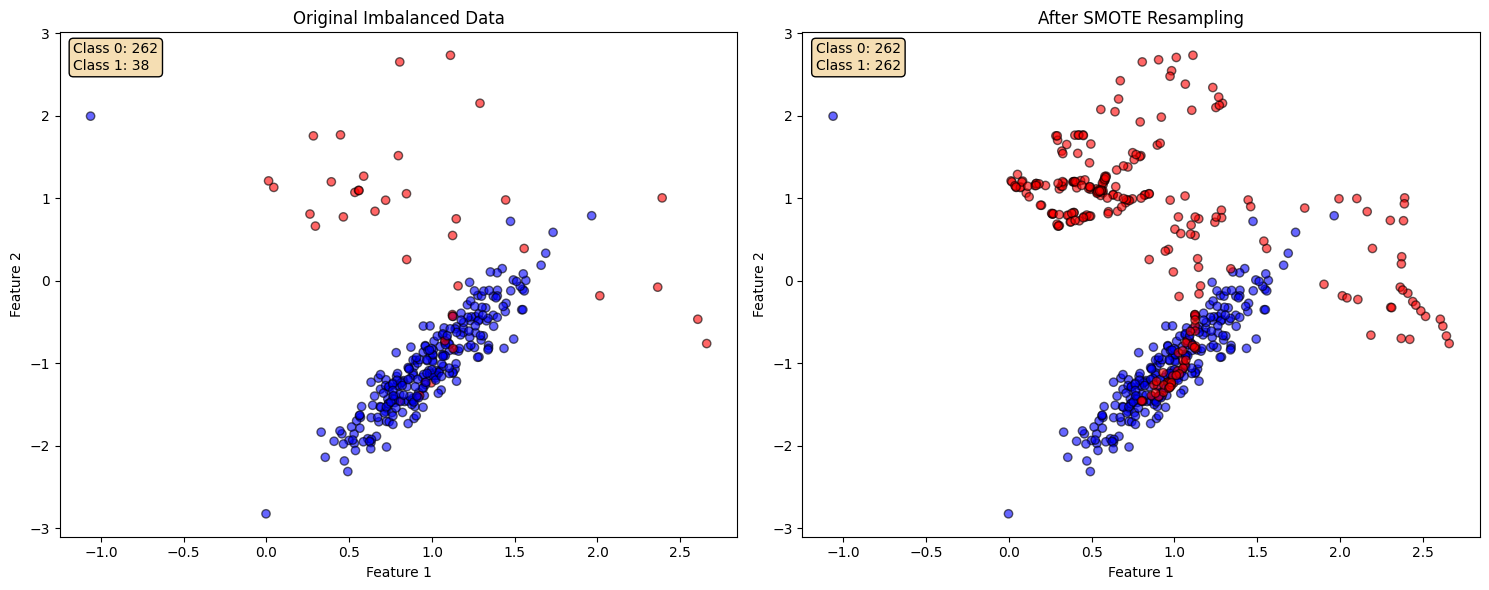

Original class distribution: {np.int64(0): np.int64(262), np.int64(1): np.int64(38)}
Resampled class distribution: {np.int64(0): np.int64(262), np.int64(1): np.int64(262)}


In [3]:
# Now let's use the actual SMOTE implementation

smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize the balanced dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original data
colors_original = ['blue' if label == 0 else 'red' for label in y]
ax1.scatter(X[:, 0], X[:, 1], c=colors_original, alpha=0.6, edgecolors='black')
ax1.set_title('Original Imbalanced Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Resampled data
colors_resampled = ['blue' if label == 0 else 'red' for label in y_resampled]
ax2.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors_resampled, 
           alpha=0.6, edgecolors='black')
ax2.set_title('After SMOTE Resampling')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# Add class counts
for ax, labels in [(ax1, y), (ax2, y_resampled)]:
    unique, counts = np.unique(labels, return_counts=True)
    text = f'Class 0: {counts[0]}\nClass 1: {counts[1]}'
    ax.text(0.02, 0.98, text, transform=ax.transAxes, 
            bbox=dict(boxstyle='round', facecolor='wheat'),
            verticalalignment='top')

plt.tight_layout()
plt.show()

print("Original class distribution:", dict(zip(*np.unique(y, return_counts=True))))
print("Resampled class distribution:", dict(zip(*np.unique(y_resampled, return_counts=True))))